# Setup

## Imports

In [1]:
# Import importlib to reload modules and sys and os to add the path for other imports
import importlib
import sys
import os
import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import utilities
from utils import setuputil, trainutil, inferutil
from classes.models import SimpleGeluEmbed

# Reload the necessary modules to ensure they are up-to-date
importlib.reload(setuputil)
importlib.reload(trainutil)
importlib.reload(inferutil)
importlib.reload(SimpleGeluEmbed)

# Import the required utils
from utils.setuputil import setup_config, display_config
from utils.trainutil import train_model
from utils.inferutil import infer_one, infer_full

# Import the SimpleGeluEmbedAdd class
from classes.models.SimpleGeluEmbed import SimpleGeluEmbedAvg

## Config Setup

In [4]:
# Define the input configuration for the simple model
input_config = {
    # Environment and Model Info
    "env": "gcp",                
    "approach": "simple",         
    "model_name": "SimpleGeluEmbedAvg",
    
    # System Configuration
    "device": "cuda:0",
    "threads": 8,
    "seed": 42,
    
    # Data Configuration
    "data_dir": "../data/",
    "data_ds": "manual",
    
    # Model Parameters
    "rows": 100,
    "cols": 100,
    "tokens": 32,
    
    # Vocabulary Parameters
    "vocab_size": 150000,
    "vocab_space": True,
    "vocab_case": "both",
    
    # Training Parameters
    "batch": 40,
    "lr": 1e-1,
    "mu": 0.25,
    "epochs": 20,
    "patience": 2,
    "save_int": 0,
    "save_dir": '../models/'
}

# Setup the configuration using setuputil and display it
config = setup_config(input_config)
display_config(config)

# Define local variables from the config dictionary
# System variables
DEVICE = config["DEVICE"]
THREADS = config["THREADS"]

# Data loaders and vocab
train_loader = config["train_loader"]
val_loader = config["val_loader"]
test_loader = config["test_loader"]
spreadsheet_vocab = config["vocab"]
spreadsheet_wvs = config["wvs"]

# Training parameters
batch_size = config["batch"]
lr = config["lr"]
mu = config["mu"]
epochs = config["epochs"]
patience = config["patience"]
save_int = config["save_int"]
save_dir = config["save_dir"]
save_name = config["save_name"]


Getting Vocab: 100%|██████████| 40/40 [00:02<00:00, 17.80it/s]


40(P) = 40(G) + 0(E)
Unique Tokens: 5593
Vocab Size: 5597


Creating Word Embeddings: 100%|██████████| 5597/5597 [00:00<00:00, 147488.01it/s]


Word Embeddings Shape: torch.Size([5597, 50])


Processing files: 100%|██████████| 40/40 [00:00<00:00, 56.62it/s]



40(P) = 40(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 6133.82it/s]



5(P) = 5(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 12314.46it/s]



5(P) = 5(G) + 0(E)

Configuration for SIMPLE approach:
{
  "env": "gcp",
  "approach": "simple",
  "model_base": "glove50",
  "model_name": "SimpleGeluEmbedAvg",
  "rows": 100,
  "cols": 100,
  "tokens": 32,
  "DEVICE": "cpu",
  "THREADS": 8,
  "seed": 42,
  "data_ds": "manual",
  "data_dir": "../data/",
  "train_dir": "../data/manual_train",
  "val_dir": "../data/manual_val",
  "test_dir": "../data/manual_test",
  "vocab_size": 5597,
  "vocab_space": true,
  "vocab_case": "both",
  "vocab": "<Vocab Object>",
  "wvs": "<Embedding Matrix>",
  "train_loader": "<LoaderSimple Object>",
  "val_loader": "<LoaderSimple Object>",
  "test_loader": "<LoaderSimple Object>",
  "batch": 40,
  "lr": 0.1,
  "mu": 0.25,
  "epochs": 20,
  "patience": 2,
  "save_int": 0,
  "save_dir": "../models/",
  "save_name": "gsim42_SimpleGeluEmbedAvg_manual_100x100x32_bSp5k_bsz40lr1e-1ep20pa2"
}


In [5]:
# Get the first item from train_loader
first_item = train_loader[0]

# Get the components
x_tok = first_item['x_tok']
x_masks = first_item['x_masks']
y_tok = first_item['y_tok']
filepath = first_item['file_paths']

print(f"File: {filepath}\n")

print("Shapes:")
print(f"x_tok: {x_tok.shape}")  # Should be 32-length vector
print(f"y_tok: {y_tok.shape}")  # Should be 32-length vector
print(f"x_masks: {x_masks.shape if isinstance(x_masks, torch.Tensor) else len(x_masks)}\n")

# Extract cell location [10,10]
x_cell = x_tok[10,10,:]  
y_cell = y_tok[10,10,:]

print("Values at position [10,10]:")
print(f"\nx_tok: {x_cell.tolist()}")
print(f"\nx_tok decoded: {[spreadsheet_vocab.decode(idx) for idx in x_cell.tolist()]}")
print(f"\ny_tok: {y_cell.tolist()}")



# Get the first item from train_loader
first_item = val_loader[0]

# Get the components
x_tok = first_item['x_tok']
x_masks = first_item['x_masks']
y_tok = first_item['y_tok']
filepath = first_item['file_paths']

print(f"File: {filepath}\n")

print("Shapes:")
print(f"x_tok: {x_tok.shape}")  # Should be 32-length vector
print(f"y_tok: {y_tok.shape}")  # Should be 32-length vector
print(f"x_masks: {x_masks.shape if isinstance(x_masks, torch.Tensor) else len(x_masks)}\n")

# Extract cell location [10,10]
x_cell = x_tok[10,10,:]  
y_cell = y_tok[10,10,:]

print("Values at position [10,10]:")
print(f"\nx_tok: {x_cell.tolist()}")
print(f"\nx_tok decoded: {[spreadsheet_vocab.decode(idx) for idx in x_cell.tolist()]}")
print(f"\ny_tok: {y_cell.tolist()}")

File: ../data/manual_train/idrportfolio-by-debt-size.xls

Shapes:
x_tok: torch.Size([100, 100, 32])
y_tok: torch.Size([100, 100, 17])
x_masks: torch.Size([0])

Values at position [10,10]:

x_tok: [2, 0, 89, 60, 59, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

x_tok decoded: ['[CLS]', '[UNK]', '56', '.', '0', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']

y_tok: [6, 0, 2, 1, 1, 12, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0]
File: ../data/manual_val/portfolio-by-debt-size.xls

Shapes:
x_tok: torch.Size([100, 100, 32])
y_tok: torch.Size([100, 100, 17])
x_masks: torch.Size([0])

Values at position [10,10]:

x_tok: [2, 0, 1662, 60, 83, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

x_tok decoded: ['[CLS]', '[UNK]', '197', '.', '6', '[SE

# Model Training

## Define the model

In [6]:
# Define the untrained model and move it to the device
untrained_model = SimpleGeluEmbedAvg(spreadsheet_wvs).to(DEVICE)
print(untrained_model)

SimpleGeluEmbedAvg(
  (_embed): Embedding(5597, 50)
  (_drop): Dropout(p=0.05, inplace=False)
  (_non_linear): GELU(approximate='none')
  (_pred): Linear(in_features=50, out_features=1, bias=True)
)


## Train the Model

In [7]:
trained_model = train_model(
    model=untrained_model,
    train_data=train_loader, 
    val_data=val_loader, 
    DEVICE=DEVICE, 
    batch_size=batch_size,
    lr=lr,
    mu=mu,
    max_epochs=epochs,
    patience=patience,
    save_int=save_int,
    save_dir=save_dir,
    save_name=save_name,
    config=config
)

Epoch 0


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]


Train Loss: 1.7712949514389038, Perplexity: 1.0000177131063896
Val Loss: 0.6550521850585938, Perplexity: 1.0000065505433053


Epoch 1


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]


Train Loss: 0.6672309637069702, Perplexity: 1.000006672331897
Val Loss: 0.40676796436309814, Perplexity: 1.0000040676879167


Epoch 2


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]


Train Loss: 0.40906405448913574, Perplexity: 1.0000040906489116
Val Loss: 0.3376685082912445, Perplexity: 1.0000033766907839


Epoch 3


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


Train Loss: 0.34083428978919983, Perplexity: 1.0000034083487064
Val Loss: 0.3503698706626892, Perplexity: 1.0000035037048445


Epoch 4


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]


Train Loss: 0.3457877039909363, Perplexity: 1.0000034578830184
Val Loss: 0.3128856122493744, Perplexity: 1.0000031288610174


Epoch 5


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


Train Loss: 0.31490328907966614, Perplexity: 1.000003149037849
Val Loss: 0.3159107565879822, Perplexity: 1.0000031591125558


Epoch 6


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


Train Loss: 0.3126889765262604, Perplexity: 1.000003126894654
Val Loss: 0.28706008195877075, Perplexity: 1.0000028706049398


Epoch 7


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]


Train Loss: 0.28819847106933594, Perplexity: 1.0000028819888636
Val Loss: 0.2806623876094818, Perplexity: 1.0000028066278146


Epoch 8


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]


Train Loss: 0.2801528573036194, Perplexity: 1.0000028015324973
Val Loss: 0.26722222566604614, Perplexity: 1.000002672225827


Epoch 9


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]


Train Loss: 0.26947665214538574, Perplexity: 1.0000026947701524
Val Loss: 0.26035788655281067, Perplexity: 1.000002603582255


Epoch 10


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]


Train Loss: 0.26105839014053345, Perplexity: 1.000002610587309
Val Loss: 0.2504306733608246, Perplexity: 1.0000025043098695


Epoch 11


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


Train Loss: 0.2528530955314636, Perplexity: 1.000002528534152
Val Loss: 0.24330008029937744, Perplexity: 1.0000024330037627


Epoch 12


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]


Train Loss: 0.24549199640750885, Perplexity: 1.0000024549229773
Val Loss: 0.23443640768527985, Perplexity: 1.000002344366825


Epoch 13


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]


Train Loss: 0.23870232701301575, Perplexity: 1.000002387026119
Val Loss: 0.22763609886169434, Perplexity: 1.0000022763635796


Epoch 14


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]


Train Loss: 0.23101145029067993, Perplexity: 1.0000023101171713
Val Loss: 0.21916480362415314, Perplexity: 1.0000021916504378


Epoch 15


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


Train Loss: 0.22485753893852234, Perplexity: 1.0000022485779174
Val Loss: 0.21272343397140503, Perplexity: 1.0000021272366022


Epoch 16


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


Train Loss: 0.21832400560379028, Perplexity: 1.0000021832424393
Val Loss: 0.20423687994480133, Perplexity: 1.000002042370885


Epoch 17


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]


Train Loss: 0.21082371473312378, Perplexity: 1.0000021082393697
Val Loss: 0.19812892377376556, Perplexity: 1.0000019812912004


Epoch 18


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]


Train Loss: 0.20485836267471313, Perplexity: 1.000002048585725
Val Loss: 0.19033785164356232, Perplexity: 1.0000019033803278


Epoch 19


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

Train Loss: 0.19968107342720032, Perplexity: 1.0000019968127278
Val Loss: 0.18607889115810394, Perplexity: 1.000001860790643



TRAINING DONE at epoch 19, best epoch 19
Train Loss = 0.19968107342720032, Perplexity = 1.0000019968127278
Val Loss = 0.18607889115810394, Perplexity = 1.000001860790643


# Evaluation

In [8]:
# Define params for evaluation
thresh = 0.91
loc = 0
cond = '>'
disp_max=True

## Single Example


Filename: ../data/manual_train/idrportfolio-by-debt-size.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(6,0): 0.92122071981430053711
(19,0): 0.92258673906326293945
(9,1): 0.92293816804885864258
(15,0): 0.92411464452743530273
(11,0): 0.92553770542144775391
(6,1): 0.92627358436584472656
(7,0): 0.92684721946716308594
(8,1): 0.92784041166305541992
(4,14): 0.93034374713897705078
(7,1): 0.93049514293670654297
(4,18): 0.94037997722625732422
(4,8): 0.95792800188064575195
(4,6): 0.95963793992996215820
(4,16): 0.96028423309326171875
(4,12): 0.96033889055252075195
(4,10): 0.96050369739532470703
(5,0): 0.96401149034500122070
(4,4): 0.96570891141891479492
(4,2): 0.97250956296920776367
(5,3): 0.98328870534896850586
(0,0): 0.98709756135940551758
(5,2): 0.99441754817962646484
(5,4): 0.99493956565856933594

NB to B ratio: Predicted = 9912:88 | Actual = 9912:88
Accuracy: 100.00% | Precision: 100.00% | Recall: 100.00% | F1-Score: 1.00



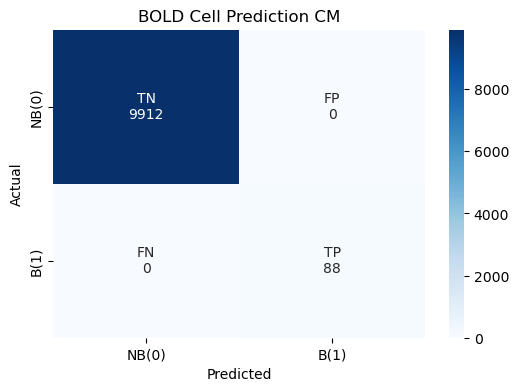


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



Filename: ../data/manual_val/portfolio-by-debt-size.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(6,0): 0.92122071981430053711
(21,0): 0.92258673906326293945
(7,1): 0.92293816804885864258
(17,0): 0.92411464452743530273
(13,0): 0.92553770542144775391
(8,1): 0.92627358436584472656
(9,0): 0.92684721946716308594
(6,1): 0.92784041166305541992
(4,14): 0.93034374713897705078
(9,1): 0.93049514293670654297
(4,18): 0.94037997722625732422
(4,8): 0.95792800188064575195
(4,6): 0.95963793992996215820
(4,16): 0.96028423309326171875
(4,12): 0.96033889055252075195
(4,10): 0.96050369739532470703
(5,0): 0.96401149034500122070
(4,4): 0.96570891141891479492
(4,2): 0.97250956296920776367
(5,3): 0.98328870534896850586
(0,0): 0.99292314052581787109
(5,2): 0.99441754817962646484
(5,4): 0.99493956565856933594

NB to B ratio: Predicted = 9908:92 | Actual = 9908:92
Accuracy: 100.00% | Precision: 100.00% | Recall: 100.00% | F1-Score: 1.00



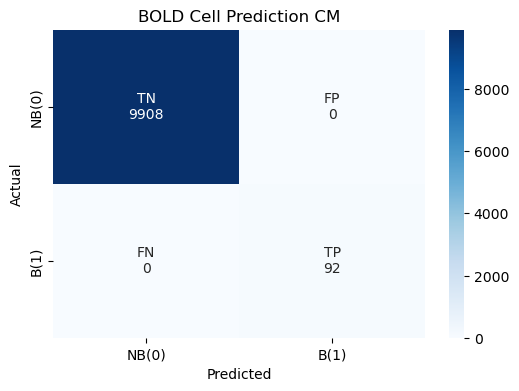


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



Filename: ../data/manual_test/harassment-bullying-on-basis-of-disability-reported.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(5,22): 0.91925394535064697266
(3,1): 0.92027133703231811523
(4,11): 0.92112022638320922852
(1,1): 0.92799687385559082031
(5,3): 0.92838722467422485352
(5,4): 0.93132352828979492188
(5,18): 0.93176460266113281250
(4,5): 0.93401861190795898438
(3,2): 0.95062440633773803711
(3,3): 0.95687639713287353516
(3,23): 0.96300119161605834961
(3,21): 0.96931195259094238281
(4,15): 0.97171264886856079102
(4,9): 0.97546321153640747070
(3,24): 0.97663259506225585938
(4,3): 0.98357981443405151367
(4,7): 0.98451346158981323242
(4,13): 0.98729139566421508789
(3,17): 0.98741328716278076172
(3,19): 0.99264973402023315430

NB to B ratio: Predicted = 9929:71 | Actual = 9931:69
Accuracy: 99.98% | Precision: 97.18% | Recall: 100.00% | F1-Score: 0.99



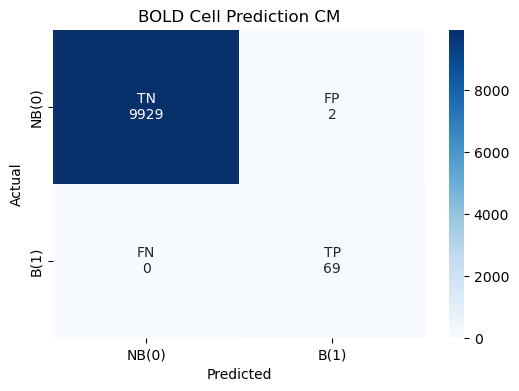


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0


In [9]:
# Check with single example
infer_one(trained_model, train_loader, loc=loc, threshold=thresh, condition=cond, disp_max=disp_max, device=DEVICE)
infer_one(trained_model, val_loader, loc=loc, threshold=thresh, condition=cond, disp_max=disp_max, device=DEVICE)
infer_one(trained_model, test_loader, loc=loc, threshold=thresh, condition=cond, disp_max=disp_max, device=DEVICE)

## All Examples

In [ ]:
# Evaluate the model on all train files
infer_full(trained_model, train_loader, batch_size=batch_size, threshold=thresh, device=DEVICE)

Batch Inference:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# All val files
infer_full(trained_model, val_loader, batch_size=batch_size, threshold=thresh, device=DEVICE)

In [ ]:
# All test files
infer_full(trained_model, test_loader, batch_size=batch_size, threshold=thresh, device=DEVICE)